In [36]:
"""Feature engineering:
- Criar coluna de periodo  (manhã/tarde/noite/madrugada)
- Criar coluna de dia da semana (segunda, terça, quarta, quinta, sexta, sábado, domingo)
- 
"""

'Feature engineering:\n- Criar coluna de periodo  (manhã/tarde/noite/madrugada)\n- Criar coluna de dia da semana (segunda, terça, quarta, quinta, sexta, sábado, domingo)\n- \n'

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/flights2.csv')
print(df.shape)
df.head()

(71175, 11)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,1,SN,Embraer E175,schengen,YJC,17.970480,19.970480,0,2010,False,47.249680
1,2,UD,Boeing 787,non-schengen,LLT,9.283161,11.283161,0,2010,False,22.225068
2,3,UD,Embraer E175,non-schengen,GWC,15.198523,18.198523,0,2010,False,29.958366
3,4,SN,Airbus A320,non-schengen,HDM,17.181562,20.181562,0,2010,False,52.580684
4,5,RN,Airbus A320,schengen,GWC,15.356914,18.356914,0,2010,False,35.914942


In [7]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

# Perform label encoding
label_mapping = {True: 1, False: 0, 'schengen': 1, 'non-schengen': 0}
df_encoded['is_holiday'] = df['is_holiday'].map(label_mapping)
df_encoded['schengen'] = df['schengen'].map(label_mapping)


# Print the updated DataFrame
print(df_encoded.shape)
df_encoded.head()

(71175, 23)


,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_RN,airline_SN,...,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_BVH,origin_DMC,origin_GWC,origin_HDM,origin_LLT,origin_RJU,origin_YJC
0,1,1,17.970480,19.970480,0,2010,0,47.249680,0,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,9.283161,11.283161,0,2010,0,22.225068,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,0,15.198523,18.198523,0,2010,0,29.958366,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4,0,17.181562,20.181562,0,2010,0,52.580684,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5,1,15.356914,18.356914,0,2010,0,35.914942,1,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# Drop unnecessary columns
df_cleaned = df_encoded.drop(['flight_id', 'arrival_time', 'departure_time', 'day', 'year'], axis=1)
# df_cleaned = df_cleaned[['is_holiday', 'airline_EW', 'airline_KW', 'airline_MF', 'delay']]
# subset = df_cleaned.sample(n=10000)

# Separate X and y
X = df_cleaned.drop('delay', axis=1)
y = df_cleaned['delay']
# normalize y 
m= y.mean()
s = y.std()
y = (y-m)/s





# Print the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Print the updated DataFrame
X.head()

X shape: (71175, 17)
y shape: (71175,)


,schengen,is_holiday,airline_RN,airline_SN,airline_UD,aircraft_type_Airbus A320,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_BVH,origin_DMC,origin_GWC,origin_HDM,origin_LLT,origin_RJU,origin_YJC
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [9]:
y

0        0.994796
1        0.006018
2        0.311578
3        1.205437
4        0.546935
           ...   
71170    0.234307
71171    0.486119
71172    0.028939
71173    0.971603
71174    1.721219
Name: delay, Length: 71175, dtype: float64

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train.shape

(56940, 17)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'random_state': [42]
}

# Create the RandomForestRegressor model
rfr = RandomForestRegressor()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rfr = random_search.best_estimator_
best_params = random_search.best_params_

# Train the best model
best_rfr.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_rfr.predict(X_test)

# Convert predictions and true values back to the original scale
y_pred = y_pred * s + m
y_test = y_test * s + m

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error: {:.2f} minutes".format(mse))
print("Mean Absolute Error: {:.2f} minutes".format(mae))
print("R-squared Score: {:.2f}".format(r2))


Best Hyperparameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}
Mean Squared Error: 714607.30 minutes
Mean Absolute Error: 676.97 minutes
R-squared Score: -0.72


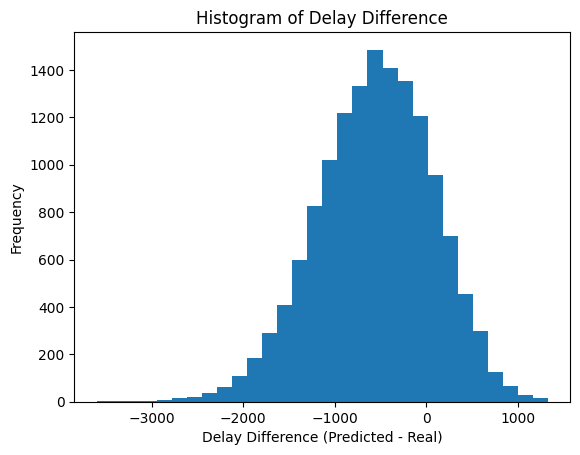

In [30]:
# Calculate the difference between predicted and real delays
delay_diff = y_pred - y_test

# Plot histogram of delay difference
plt.hist(delay_diff, bins=30)
plt.xlabel("Delay Difference (Predicted - Real)")
plt.ylabel("Frequency")
plt.title("Histogram of Delay Difference")
plt.show()

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'random_state': [42]
}

# Create the RandomForestRegressor model
rfr = RandomForestRegressor()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, cv=5, scoring='mean_absolute_error', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rfr = random_search.best_estimator_
best_params = random_search.best_params_

# Train the best model
best_rfr.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred = best_rfr.predict(X_test)

# Convert predictions and true values back to the original scale
y_pred = y_pred * s + m
y_test = y_test * s + m

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error: {:.2f} minutes".format(mse))
print("Mean Absolute Error: {:.2f} minutes".format(mae))
print("R-squared Score: {:.2f}".format(r2))

ValueError: 'mean_absolute_error' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.